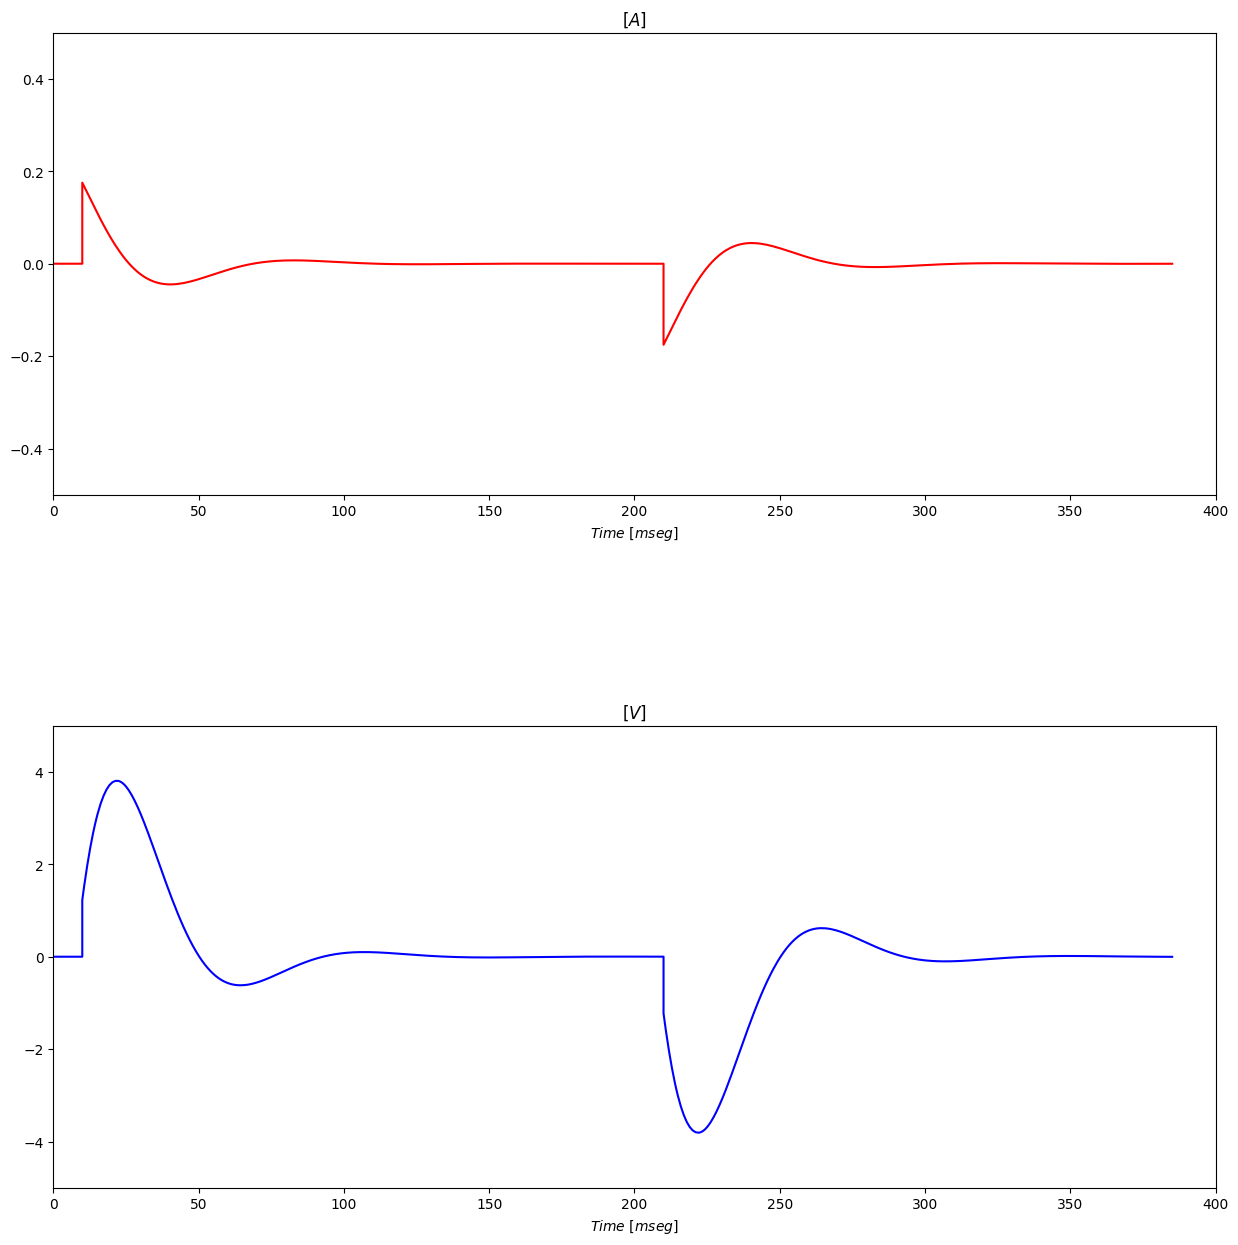

In [12]:
import ltspice
import numpy as np
import matplotlib.pyplot as plt
import os

#------------Load the signals from the .raw file
raw_file = 'Simulacion_con_valores_Fijos\\Simulacion_SPICE_Valores_Fijos.raw'
l = ltspice.Ltspice(raw_file) 
# Make sure that the .raw file is located in the correct path
l.parse()
#-----------------------------------------------

#Parameters for the circuit
Fs = 2.5
Ts = 1/Fs

#----------------------------Obtain basic signals
time = l.get_time()
time = (time) * 1E+3         
Vcc = l.get_data('V(vcc)')
Vlplus = l.get_data('V(vl+)')
Vlminus = l.get_data('V(vl-)')
Vl = Vlplus - Vlminus

ic = l.get_data('I(C1)')
id = l.get_data('I(V1)')
#------------------------------------------------

chargeTime = np.linspace(0, 200, 1000)
dischargeTime = np.linspace(200, 400, 1000)

#tension de carga de la bobina
Vltc = - 0.19 * 0.45 * np.exp(-42.73 * (chargeTime -10) * 1E-3) * ( 42.73 * np.cos( 73.84 * (chargeTime -10) * 1E-3 + 2.79) + 73.84 * np.sin( 73.84 * (chargeTime -10) * 1E-3 + 2.79))
#tension de descarga de la bobina
Vltd = 0.19 * 0.45 * np.exp(-42.73 * (dischargeTime - 210) * 1E-3) * ( 42.73 * np.cos( 73.84 * (dischargeTime - 210) * 1E-3 + 2.79) + 73.84 * np.sin( 73.84 * (dischargeTime - 210) * 1E-3 + 2.79))

#Corriente de carga del capacitor
ictc = - 7.38  * 300E-6 * np.exp(-42.73 * (chargeTime -10) * 1E-3) * ( 42.73 * np.cos( 73.84 * (chargeTime -10) * 1E-3 + 4.567) + 73.84 * np.sin( 73.84 * (chargeTime -10) * 1E-3 + 4.567))
#Corriente de descarga del capacitor
ictd = 7.38  * 300E-6 * np.exp(-42.73 * (dischargeTime - 210) * 1E-3) * ( 42.73 * np.cos( 73.84 * (dischargeTime - 210) * 1E-3 + 4.567) + 73.84 * np.sin( 73.84 * (dischargeTime - 210) * 1E-3 + 4.567))


#Set max and min Voltages and currents
V_upper_limit = 5
V_lower_limit = -5
I_upper_limit = 0.5
I_lower_limit = -0.5

fig = plt.figure(figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

#Current plot
plt.subplot(2, 1, 1)
plt.title("$[A]$")       #title
plt.xlabel("$Time\ [m seg]$")
plt.xlim(0, Ts*1E+3)
plt.ylim(I_lower_limit, I_upper_limit)

plt.plot(time , ic, 'r')

#Voltage plot
plt.subplot(2, 1, 2)
plt.title("$[V]$")
plt.xlabel("$Time\ [m seg]$")
plt.xlim(0, Ts*1E+3)
plt.ylim(V_lower_limit, V_upper_limit)

plt.plot(time , Vl, 'b')
plt.show()